In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns

# matplotlib 한글 설정 (전체 설정은 생략하고 개별적으로 font 적용)
plt.rcParams['font.family'] = 'NanumBarunGothic'

In [3]:
df = pd.read_csv("../data/공구마감률추이_조인테이블_revised.csv")

df.head()

,group_board_id,created_at,deadline,status,location,group_product_id
0,1,2024-12-31,2025-06-28,마감임박,수원,189
1,2,2024-12-05,2025-05-30,모집마감,수원,111
2,3,2024-12-08,2025-06-23,마감임박,대구,331
3,4,2025-01-07,2025-06-19,공구성공,대전,98
4,5,2025-03-21,2025-05-30,모집마감,부산,498


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   group_board_id    500 non-null    int64 
 1   created_at        500 non-null    object
 2   deadline          500 non-null    object
 3   status            500 non-null    object
 4   location          500 non-null    object
 5   group_product_id  500 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


In [5]:
# 날짜 타입으로 변환
df['created_at'] = pd.to_datetime(df['created_at'])
df['deadline'] = pd.to_datetime(df['deadline'])

print(df['status'].unique())

['마감임박' '모집마감' '공구성공' '모집중']


## 주차별/월별 공구 생성 수 & 마감 상태 분포

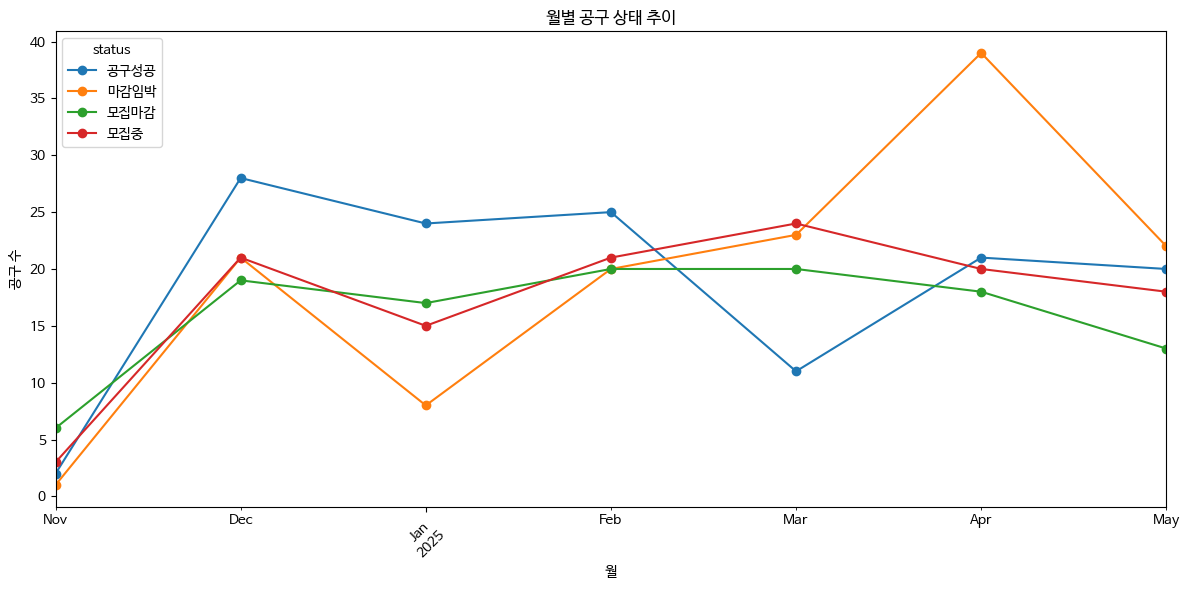

In [6]:
# 월 단위로 묶기
df['year_month'] = df['created_at'].dt.to_period('M')

# 상태별 마감률 추이 (월별)
monthly_status = df.groupby(['year_month', 'status']).size().unstack(fill_value=0)

# 시각화
import matplotlib.pyplot as plt

monthly_status.plot(kind='line', marker='o', figsize=(12,6))
plt.title('월별 공구 상태 추이')
plt.xlabel('월')
plt.ylabel('공구 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 지역별 공구 성공률 분석

In [7]:
# 상태 기준으로 공구 성공 여부 부여
df['success'] = df['status'].apply(lambda x: 1 if x == '공구성공' else 0)

# 지역별 마감률 평균
region_success = df.groupby('location')['success'].agg(['mean', 'count']).sort_values('mean', ascending=False)
region_success = region_success.rename(columns={'mean': '공구성공률', 'count': '공구방 수'})

region_success

,공구성공률,공구방 수
location,,
수원,0.333333,60
부산,0.306452,62
인천,0.283582,67
서울,0.254902,51
울산,0.250000,64
대구,0.228571,70
대전,0.225352,71
광주,0.218182,55


## 월별 마감률 변화 분석

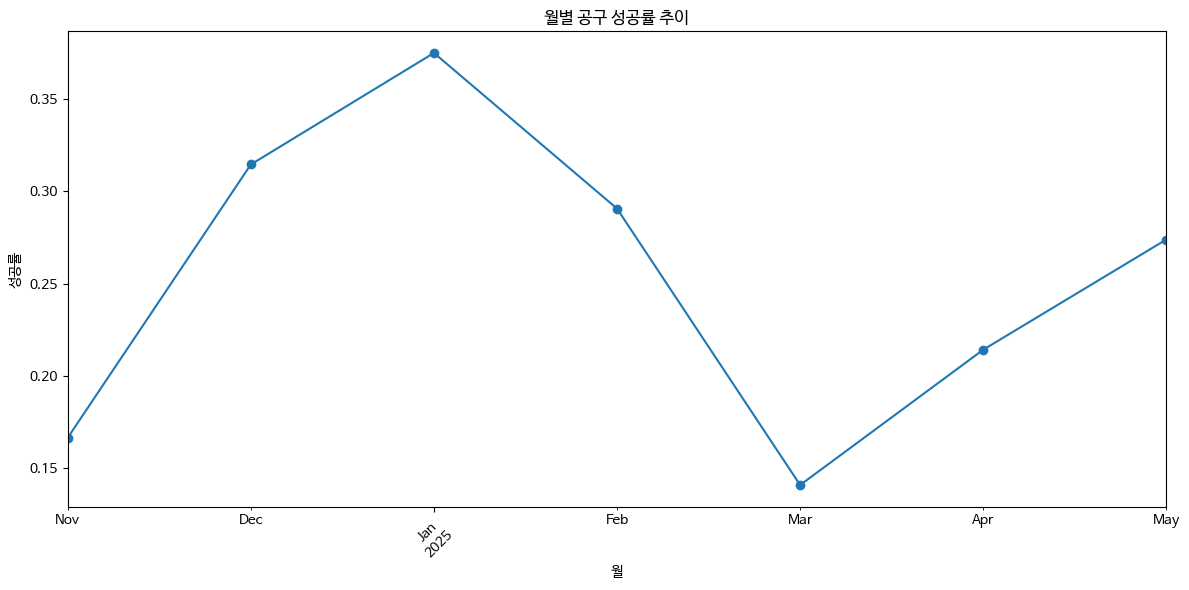

In [8]:
monthly_total = df.groupby('year_month').size()
monthly_success = df[df['status'] == '공구성공'].groupby('year_month').size()
monthly_success_rate = (monthly_success / monthly_total).fillna(0)

# 시각화
monthly_success_rate.plot(kind='line', marker='o', figsize=(12,6))
plt.title('월별 공구 성공률 추이')
plt.ylabel('성공률')
plt.xlabel('월')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6월 1주차 마감률 급증: 특정 시즌 집중 캠페인 효과 가능
전자기기 마감률 하락: 관심도 저하로 프로모션 필요
부산/대전 공구 성공률 높음: 우선 마케팅 지역 선정
수원은 마감 실패율 높음: 리더 관리 또는 제품 개선 필요

이런 인사이트 도출할 수 있을 듯 시각화 자료 자체를 분석하지는 않았음(더미데이터라)
이런 프로세스로 얻을거다~~하는

카테고리별 마감률 (성공률) 분석도 하려고 했는데 조인 할 떄 category_id와 products_df 이 없어서 안했음 나중에 할 수 있으면 추가할게용 하면 인기 카테고리/성공률 비교 가능함